## Linear vs Non-Linear seperable data

### Linear seprable data
<img src="pic2.png">

### Non Linear seprable data
<img src="pic1.png">

### Non Linear seprable data without outliers
<img src="pic2.png">

***
Ques - How many boolean functions can you design from 2 inputs?

Ans  - 16 = $ 4^{2} $
***

***
Ques - How many boolean functions can you design from n inputs?

Ans  -  $ 2^{2^{n}} $
***

### Can Deep learning Solve Any Problems

### Representation Power of network of perceptron

<img src="https://i.stack.imgur.com/gIHAN.jpg">

this is a network of perceptron . 
***
#### Theorem 
Any boolean function of n inputs can be expresses exactly by a network of perceptron containing 1 hidden layers with $ 2^{n} $ perceptrons and one output layers . where n is no of inputs
***


***
#### Why need of some smoother functions
 - The thresholding logic used by a perceptron
is very harsh !
***

#### Sigmoid neurons

Introducing sigmoid neurons where the out-put function is much smoother than the step function


<img src="https://www.researchgate.net/profile/Addisson_Salazar/publication/279966438/figure/fig1/AS:320019977261056@1453310116799/Approximating-a-unit-step-function-using-a-sigmoid-function.png">

$$ sigmoid(x) = \dfrac{1}{1+\exp(-W^{T}X)}$$

-There is no longer see a sharp transition around the threshold $ -w_0 $

-Also the output y is no longer binary but a real value between 0 and 1 which can be interpreted as a probability

-for example of predictting the like/dislike of movie . Instead of a like/dislike decision we get the probability of liking the movie

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [2]:
sigmoid(0)

0.5

In [3]:
sigmoid(3123)

1.0

In [4]:
sigmoid(-123) # tends  to zero

3.8174971886711748e-54

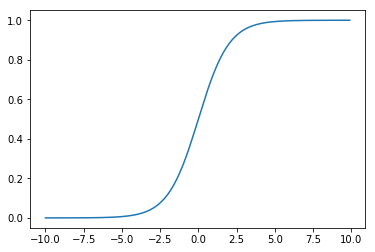

In [5]:
X_val = np.array([i/10 for i in range(-100,100)])
plt.plot(X_val,sigmoid(X_val))

<img src="pic100.png">
<img src="pic101.png">
<img src="pic102.png">

**typical machine learning setup which has the following components...**

- **Data** :$ { x_i,y_i }_{i=1}^{n} $

<br>
- **Model** : Our Approximation of the relation between X and Y for examples:
            
$$ y = \dfrac {1}{1+\exp-(W^{T}x)} $$

$$ y = \exp-(W^{T}x) $$

$$ y = X^{T}wX $$

- **Parameters** - In all the above cases , w is a parameter which needs to be learned from the data

- **Learning algorithims** - An Algorithims for learning the parameters (w) of the model(for examples,perceptron learning Algorithims,gradient descents etc )

- **Objective/Loss/Error function:** To guide the learning algorithm - the learn-
ing algorithm should aim to minimize the loss function


Lets consider a movies examples


 - ** Data **$ {x_i = movie,y_i =like/dislike}_{i=1}^{n} $
 
 - ** Model **: Our approximation of the relation betwwen x and y (the probalility of liking a movie) 
 
 <center>$ Y=\dfrac{1}{1+\exp-(W^{T}X)} $</center>
 
 - **Parameters** W
 
 - **Learning Algorithims** Gradient descents
 
 - **Objective /Loss /Error Functions** one possibility is
  $$ L(w) = \sum_{i=1}^{n} (ypred - y) $$
  
  
***
**Can we learn the parameters of models by guess works:**

In some cases yes , but large no of model's parameters ,And high dimensions of data, takes large no to converges . its not feasible by humans
*** 

#### Goal

Find a better way of traversing the error surface so that we can reach the minimum value quickly without resorting to brute force search !

#### Learning Parameters : Gradient Descents

vector of parameters say , randomly initialized $ \theta = [w,b] $

change in parameters w,b say $ \delta \theta = [\delta w,\delta b] $

<img src="pic110.png">
<img src="pic111.png">

We moved in the direc-
tion of ∆θ


Let us be a bit conservat-
ive: move only by a small

amount η

<img src="pic112.png">


<img src="pic113.png">



so by this intituions $ \theta_{new} = \theta + η \delta \theta $


so the questions is this what is the best direction of $ \delta \theta $

**Question**: What is the right ∆θ to use?



let $ \delta \theta = u $ then from Taylor series ,we have

$$ L(\theta+ηu) = L(\theta) + η * u^{T} \delta_{\theta} L(\theta) + \dfrac {η^{2}}{2!} * u^{T} \delta^{2} L(\theta) u ...  $$


from above equations the  η is very small so the  $  η^{2} ,  η^{3}  $ tends goes to zeros 0 

so neglecting those terms we have only



$$ L(\theta+ηu) = L(\theta) + η * u^{T} \delta_{\theta} L(\theta)  $$


$$ L(\theta+ηu) - L(\theta) =  η * u^{T} \delta_{\theta} L(\theta)  $$

move ηu would be favaorable only if


$ L(\theta+ηu) - L(\theta)  <0  $ [that is the new loss is less than the previous loss]

for negativity of above equation implies that below inequalities

$$ η * u^{T} \delta_{\theta} L(\theta) < 0$$


so what is the range of above equations

let $ \beta $ be the angle between $ u^{T} $ and $  \delta_{\theta} L(\theta)  $

so by the euqations of dot product we know that

$$cos (\beta) = \dfrac{u^{T} \delta_{\theta} L(\theta)} {||u^{T}|| || \delta_{\theta} L(\theta)||}$$

And we know that the  $ -1 <= cos(\beta) <= 1 $


so the maxiumum negative possible is -1 means cos(180)
 

The direction u that we intend to move in should be at 180° with respect to  the gradient.In other words, move in a direction opposite to the gradient


#### Parameters Update Equations

$$w_{t+1} = w_{t} - \eta \delta w_{t} $$

$$b_{t+1} = b_{t} - \eta \delta b_{t} $$

where $ \delta w_{t} $ and $ \delta b_{t} $ will be



$$ \delta w_{t}  = \dfrac{\delta L(w,b)}{\delta w} $$


$$ \delta b_{t}  = \dfrac{\delta L(w,b)}{\delta b} $$

#### Representation Power of a Multilayer Network of Sigmoid Neurons



A multilayer network of neurons with a single hidden layer can be used to approximate any continous functions to any desired precision 


in other words , there is a gaurantee that for any functions $ f(x): R^{n} -> R^{m}  $ , we can always find a neural network (with 1 hidden layer containing enough neurons) whose output $ g(x) $ satisifes |g(x) - f(x)| < $ \epsilon $


We are interested in knowing whether a network of neurons can be used to represent an arbitrary function (like the one shown in the figure)


<img src="pic114.png" >


We observe that such an arbitrary function can be approximated by sev-eral “tower” functions


More the number of such “tower” functions, better the approximation

<img src="pic115.png" >


Suppose there is a black box which takes the original input (x) and con-structs these tower functions

<img src="pic116.png" >


We can then have a simple network which can just add them up to approximate the function

<img src="pic117.png" >



ex - If we take the logistic function and set w to a very high value we will recover the step function


Construction of tower functions using a network of logistics sigmoid neurons


<img src="pic118.png">


Overview of constructions of Network of neurons for  plotting any arbitrary functions

<img src="pic119.png">

#### Single variable functions minimizations with gradient descents

<center>$ y = X^{2} $</center>
<center>$ \dfrac{\partial y}{\partial x} = 2X $</center>

In [6]:
X_values  = [i for i in range(-100,100)]
y_values= [i**2 for i in  X_values]

In [7]:
%matplotlib inline

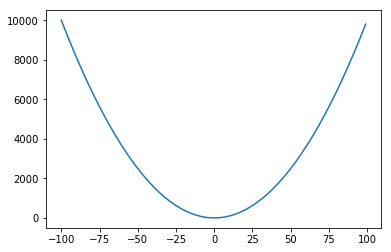

In [8]:
import matplotlib.pyplot as plt
plt.plot(X_values,y_values)

In [9]:
iteration  = 100
X = 6
for i in range(iteration):
    dx = 2*X
    X = X - 0.1*dx
print(X)

1.2222215858006927e-09


In [10]:
iteration  = 100
X = -75
for i in range(iteration):
    dx = 2*X
    X = X - 0.1*dx
print(X)

-1.527776982250866e-08


<img src="question3.png">

In [11]:
import pandas as pd

In [12]:
datasets = pd.read_csv("data2.csv")

In [13]:
datasetsX = datasets.iloc[:,0].values
datasetsY = datasets.iloc[:,1].values

In [14]:
datasetsX = np.asarray(datasetsX)

In [15]:
datasetsY= np.asarray(datasetsY)

In [16]:
datasetsX

array([  0,  -9, -14, -10,  -6,  12,  19, -18,   7,  -4,  17,  -1,   1,
         8, -13, -20, -12,  -8, -15,  14,   4,  -2,  11, -16,  -3,  10,
         3, -11,   9,  15,  -7,   5, -19,   2,  18,  13,  16, -17,  -5,   6], dtype=int64)

In [17]:
datasetsY

array([  7.31058579e-01,   4.13993755e-08,   1.87952882e-12,
         5.60279641e-09,   1.67014218e-05,   1.00000000e+00,
         1.00000000e+00,   6.30511676e-16,   9.99999694e-01,
         9.11051194e-04,   1.00000000e+00,   2.68941421e-01,
         9.52574127e-01,   9.99999959e-01,   1.38879439e-11,
         1.15482242e-17,   1.02618796e-10,   3.05902227e-07,
         2.54366565e-13,   1.00000000e+00,   9.99876605e-01,
         4.74258732e-02,   1.00000000e+00,   3.44247711e-14,
         6.69285092e-03,   9.99999999e-01,   9.99088949e-01,
         7.58256042e-10,   9.99999994e-01,   1.00000000e+00,
         2.26032430e-06,   9.99983299e-01,   8.53304763e-17,
         9.93307149e-01,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   4.65888615e-15,   1.23394576e-04,
         9.99997740e-01])

In [18]:
#as given in questions
learning_rate = 0.01
weight = 1
bias =1
no_iter =100

In [19]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [20]:
def error(ypred,ytrue):
    error = 0 
    for i in range(len(ypred)):
        error+=0.5 *  ((ypred[i]-ytrue[i])**2)
    return error

In [21]:
def grad_w(ypred,ytrue,X,w):
    dw =0 
    for i in range(len(ypred)):
        dw+= (ypred[i]-ytrue[i])*(sigmoid_der(ypred[i]))*X[i]
    return dw

In [22]:
def grad_b(ypred,ytrue,X,w):
    db =0 
    for i in range(len(ypred)):
        db+= (ypred[i]-ytrue[i])*(sigmoid_der(ypred[i]))
    return db

In [23]:
def gradient_descent(x,y,w,b,lrate,iteration):
    newweight =w
    newbias =b
    for i in range(iteration):
        ypred = []
        dw =0
        db=0
        for j in range(len(x)):
            #print(x[j])
            ypred.append(sigmoid(newweight*x[j]+newbias))
        print(error(ypred,y))
        dw = grad_w(ypred,y,x,w)
        db = grad_b(ypred,y,x,w)
        newweight = newweight - lrate*dw
        newbias=  newbias -lrate*db
    return newweight,newbias
        
        

In [24]:
neww,newb = gradient_descent(datasetsX,datasetsY,weight,bias,learning_rate,no_iter)

0.06240144645
0.0614929284589
0.0606053551084
0.0597380239193
0.0588902640682
0.0580614345885
0.057250922694
0.0564581422164
0.0556825321475
0.0549235552772
0.0541806969208
0.0534534637282
0.0527413825694
0.0520439994897
0.0513608787304
0.0506916018098
0.05003576666
0.049392986816
0.0487628906528
0.0481451206678
0.0475393328049
0.0469451958177
0.0463623906691
0.0457906099645
0.0452295574174
0.0446789473442
0.0441385041863
0.0436079620592
0.0430870643247
0.0425755631871
0.0420732193094
0.0415798014506
0.0410950861211
0.0406188572565
0.0401509059072
0.0396910299439
0.0392390337782
0.0387947280964
0.0383579296067
0.0379284607989
0.037506149715
0.0370908297312
0.0366823393505
0.0362805220045
0.0358852258645
0.0354963036618
0.0351136125154
0.0347370137685
0.0343663728319
0.0340015590338
0.0336424454774
0.0332889089039
0.0329408295621
0.0325980910829
0.0322605803598
0.0319281874346
0.0316008053871
0.0312783302305
0.0309606608103
0.0306476987077
0.0303393481474
0.0300355159083
0.0297361112386

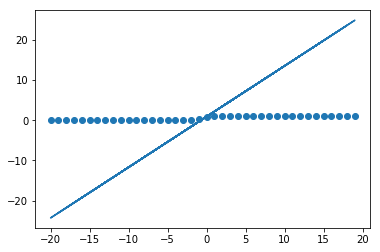

In [25]:
plt.scatter(datasetsX,datasetsY)
plt.plot(datasetsX,np.array(datasetsX)*neww+newb)
plt.show()

In [26]:
# so closely answer is 0.028 

<img src="question4.png">

In [27]:
def h11(x):
    return (1/(1+np.exp(-(400*x+24))))
def h12(x):
    return (1/(1+np.exp(-(400*x-24))))
def h21(x):
    return h11(x) - h12(x)

In [28]:
x_values =np.array([x/1000 for x in range(-1000,1000)]) #equavalient to -1 to 1

In [29]:
y_val = h21(x_values)

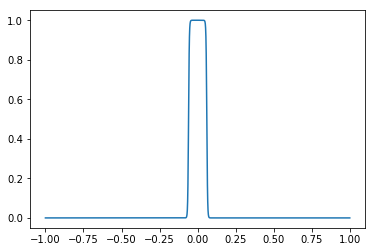

In [30]:
plt.plot(x_values,y_val) #this is equivalent to 3

<img src="question5.png">
<img src="question6.png">

In [31]:
def h11(x1,x2):
    return (1/(1+np.exp(-(x1+100*x2+200))))
def h12(x1,x2):
    return (1/(1+np.exp(-(x1+100*x2-200))))
def h13(x1,x2):
    return (1/(1+np.exp(-(100*x1+x2+200))))
def h14(x1,x2):
    return (1/(1+np.exp(-(100*x1+x2-200))))
def h21(x1,x2):
    return h11(x1,x2) - h12(x1,x2)
def h22(x1,x2):
    return h13(x1,x2) - h14(x1,x2)
def h31(x1,x2):
    return h21(x1,x2) + h22(x1,x2)
def f(x1,x2):
    return (1/(1+np.exp(-(50*h31(x1,x2)-100))))

In [38]:
x1 = np.array([x/100 for x in range(-500,500)]) #equavalient to -5 to 5
x2 = np.array([x/100 for x in range(-500,500)]) #equavalient to -5 to 5
x3 =f(x1,x2)

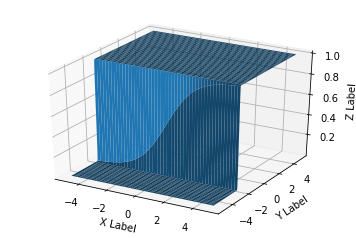

In [40]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
import matplotlib.pyplot as plt
import random

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x1, x2)
zs = np.array([h11(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
# so the b options is corrects

<img src="question7.png">

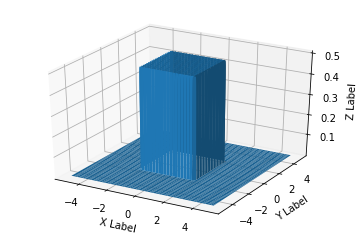

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x1, x2)
zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [42]:
# so options c is correct

<img src="question8.png">

In [44]:
# so the answer isby looking the graph of this 3d functions is 0.4

<img src="question9.png">

In [45]:
# so plot h31 functions

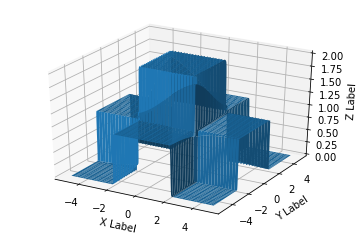

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x1, x2)
zs = np.array([h31(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
# so the answer isby looking the graph of this 3d functions is 1.5